In [ ]:
# import all the necessary libraries
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# graph wizard
from graphviz import Source
from sklearn.tree import export_graphviz

In [ ]:
# data for our model

high_blood_pressure = ["Yes", "Yes", "Yes", "Yes", "Yes", "No", "No", "No","Yes", "No", "No", "No"]
education = ["High school / GED", "High school / GED", "Some college or AA degree", "Some college or AA degree", "College graduate or above", "High school / GED", "9th-11th grade", "College graduate or above", "College graduate or above", "Less than 9th grade", "College graduate or above", "Some college or AA degree"]
diabetic = ["Yes", "Yes", "Yes", "No", "No", "No", "No", "No", "Yes", "No" ,"No", "No"]

# create a data frame from available data
data_frame = pd.DataFrame({'High Blood Pressure': high_blood_pressure, 'Education': education, 'Diabetic/Not': diabetic})

In [ ]:
# build a column transformer and change the categorical variables to one-hot encoded variables
column_transformer = make_column_transformer(
    (OneHotEncoder(), ['High Blood Pressure', 'Education']),
    remainder='passthrough')

encoded_data = column_transformer.fit_transform(data_frame)

# set new names to the columns as there number is changed
modified_column_names = ["High Blood Pressure", "Low Blood Pressure", "9th-11th grade", "College Graduate or above", "High School/GED", 
                         "< 9th grade", "Some college or AA degree", "Diabetic/Not"]

# get the feature and target names
feature_names = modified_column_names[:-1]
target_name = modified_column_names[-1]

# put the encoded data into a new dataframe
encoded_data_frame = pd.DataFrame(data=encoded_data, columns=modified_column_names)

# separate features and labels
target_data = encoded_data_frame[target_name]
features = encoded_data_frame.drop(target_name, axis = 1)

In [ ]:
features

,High Blood Pressure,Low Blood Pressure,9th-11th grade,College Graduate or above,High School/GED,< 9th grade,Some college or AA degree
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,1.0,0.0,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Build a decision tree with "entropy" as criterion
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_clf.fit(features, target_data) 

DecisionTreeClassifier(criterion='entropy', random_state=42)

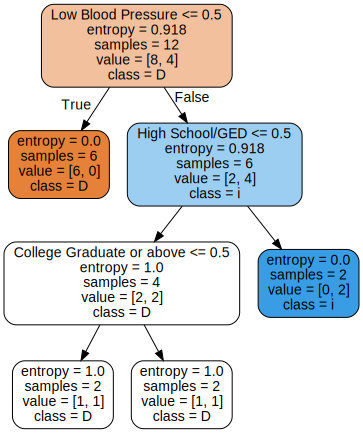

In [ ]:
# Visualize the decision tree
export_graphviz(
        tree_clf,
        out_file="diabetic_tree.dot",
        feature_names=feature_names,
        class_names=target_name,
        rounded=True,
        filled=True
    )

Source.from_file("diabetic_tree.dot")